# Exploratory Data Analysis

In [24]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('../')
import warnings
warnings.filterwarnings("ignore")
from utils.visualizations import extract_skewness_summary

# Data

In [25]:
df = pd.read_csv("./Data/clean_air_system_previous_years.csv")
print(f"Shape: {df.shape}")
df.head()

Shape: (60000, 163)


,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,0,126,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


## Since the dataframe has 163 columns and all of them are encrypted, there's not much to be done in the EDA. But, it is possible to check the skewness of each column, to see if they are normally distributed or not, and the skew mean of each type of distribution. With this, we can have an idea of how the dataframe is distributed and if there's any need for statistical transformations for normalizing the columns

In [26]:
skew_df, skew_summary = extract_skewness_summary(df, "class")

In [27]:
skew_summary

,count,skew_mean
skew_type,,
Normal,1,0.000000
Positively Skewed,161,42.475697


In [28]:
skew_df[skew_df["skew_type"] == "Normal"]

,skew value,skew_type
cd_000,0.0,Normal


In [29]:
df["cd_000"].value_counts(normalize=True)

cd_000
1209600    1.0
Name: proportion, dtype: float64

### Observations:
- 161 columns are positively skewed, with mode < median < mean
- Only one column is normally distributed
### Impact:
- All skewed columns can be put through a log and cubic transformations to see which one get the skew value closer to 0
- The normally distributed column can be dropped, since it has no variance and it will not add any value to the model

# Class Discrepancy

In [30]:
df["class"].value_counts(normalize=True)

class
0    0.983333
1    0.016667
Name: proportion, dtype: float64

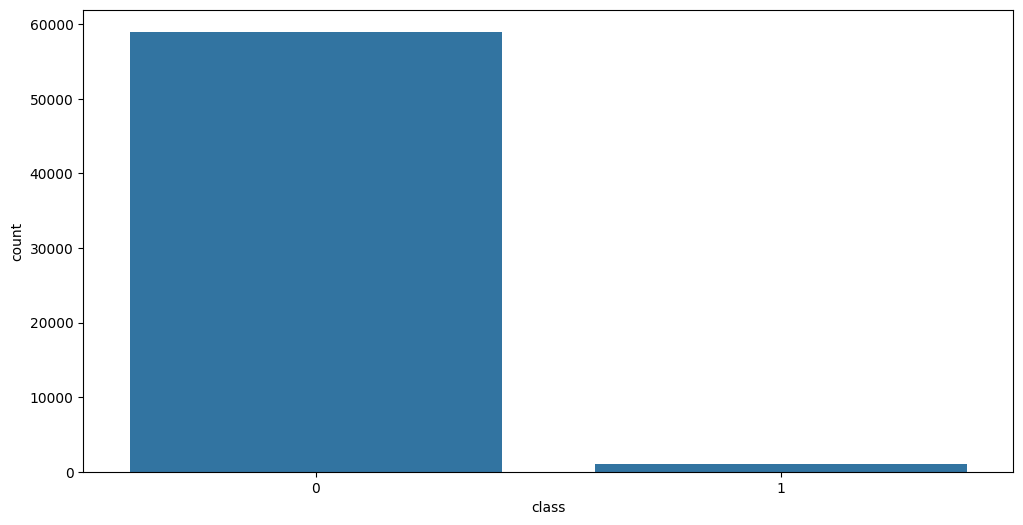

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['class'])
plt.show()

### Observations:
- There's a massive target imbalance, with 98% of the target values being 0
### Impact:
- During the model training step, this will have to be dealt with, either with over/under sampling methods, like SMOTE, or through the model parameter "class_balance". The best course of action is to test both approaches and compare the results to find the best model

# Summary

### Main Insights:
- All columns but one are positively skewed, with this one being normally distributed
- `class` has a massive data imbalance

### Implications for Feature Engineering and Modelling
- The normally distributed column can be dropped since it has no variance
- A mapping of which columns should go through which statistical transformation can be made and saved into a pkl file to be used in the preprocessor object
- Since the dataframe still has a lot of columns, PCA and ANOVA analyses can be performed to reduce the dataframe dimension
- Methods like SMOTE and "class_balance" are needed to handle the imbalance of `class`